## WINEQUALITY

## Import essential libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset

In [2]:
wine=pd.read_csv("../../datasets/winequality.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
wine.shape

(4898, 13)

Here, the total no. of rows = 4898 & the total no. of cloumns = 13

## Data Exploration

In [6]:
wine["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [7]:
wine["recommend"].value_counts()

False    3838
True     1060
Name: recommend, dtype: int64

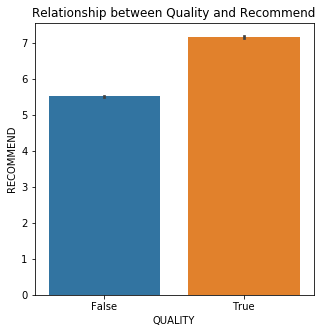

In [8]:
plt.figure(figsize=(5,5))
sns.barplot(x=wine['recommend'],y=wine['quality'])
plt.xlabel('QUALITY')
plt.ylabel('RECOMMEND')
plt.title('Relationship between Quality and Recommend')
plt.show()

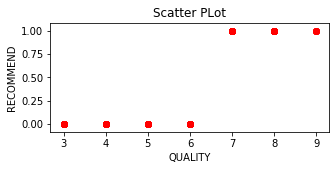

In [9]:
plt.figure(figsize=(5,2))
plt.scatter(wine.quality,wine.recommend,color='red')
plt.xlabel('QUALITY')
plt.ylabel('RECOMMEND')
plt.title("Scatter PLot")
plt.show()

- From the above exploation it is clear that the quality is directly proportional to recommend 
- So to evaluate and predict the model accurately, quality set is dicarded. 

## Seperation of dependent and independent variable

### Independent Variable

In [10]:
X=wine.iloc[:, :-2].values

In [11]:
X[0:5]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00]])

### Dependent Variable

The dependent variable is "recommend"

In [12]:
y=wine.iloc[:, -1].values

In [13]:
y[0:5]

array([False, False, False, False, False])

### To check whether the dataset has any missing values

In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  recommend             4898 non-null   bool   
dtypes: bool(1), float64(11), int64(1)
memory usage: 464.1 KB


- Since the dataset has all non-null values. 
- Therefore it has no missing data.

### Converting catogorical data into numeric

Importing label encoder for conversion

In [15]:
from sklearn.preprocessing import LabelEncoder
Label_encodr=LabelEncoder()
y=Label_encodr.fit_transform(y)
y[0:5]

array([0, 0, 0, 0, 0])

Here, False is converted to '0' & True is converted to '1'

### Splitting the data into training and test set

In [16]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X, y, train_size=0.7, random_state=100)

- The size of training set is 70% of the total data. 
- And the rest 30% is for testing the model.

### Feature Scaling

Scaling is applied on independent variables. It helps to normalise data in a particular range.

In [17]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
X_train=std_sc.fit_transform(X_train)
X_test=std_sc.transform(X_test)


## Build various classification models

## 1. DECISION TREE

In [18]:
from sklearn.tree import DecisionTreeClassifier 
decision_cls=DecisionTreeClassifier(criterion='gini',max_depth=9,random_state=100)
decision_cls.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

### Predicting the test set results

In [19]:
y_pred=decision_cls.predict(X_test)

### Making the confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm 

array([[1038,  117],
       [ 132,  183]])

### Accuracy score

In [21]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.8306122448979592

## 2. RANDOM FOREST REGRESSION

In [22]:
from sklearn.ensemble import RandomForestClassifier 
random_cls=RandomForestClassifier(criterion='entropy',random_state=100)
random_cls.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

### Predicting the test set results

In [23]:
y_pred2=random_cls.predict(X_test)

### Making the confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_pred2)
cm2

array([[1112,   43],
       [ 127,  188]])

### Accuracy score

In [25]:
from sklearn.metrics import accuracy_score
acc2=accuracy_score(y_test,y_pred2)
acc2

0.8843537414965986

## 3. SUPPORT VECTOR MACHINE

In [27]:
from sklearn.svm import SVC 
svm_cls=SVC(C=8,random_state=100)
svm_cls.fit(X_train,y_train)


SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False)

### Predicting the test set results

In [28]:
y_pred3=svm_cls.predict(X_test)

### Making the confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test,y_pred3)
cm3

array([[1095,   60],
       [ 174,  141]])

### Accuracy score

In [30]:
from sklearn.metrics import accuracy_score
acc3=accuracy_score(y_test,y_pred3)
acc3

0.8408163265306122

## CONCLUSION

In [31]:
from sklearn.metrics import classification_report
rpt1=classification_report(y_test,y_pred)
rpt2=classification_report(y_test,y_pred2)
rpt3=classification_report(y_test,y_pred3)
print('\n-->DECISION TREE\n',rpt1)
print('-->RANDOM FOREST\n',rpt2)
print('-->SUPPORT VECTOR MACHINE\n\n',rpt3)


-->DECISION TREE
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      1155
           1       0.61      0.58      0.60       315

    accuracy                           0.83      1470
   macro avg       0.75      0.74      0.74      1470
weighted avg       0.83      0.83      0.83      1470

-->RANDOM FOREST
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1155
           1       0.81      0.60      0.69       315

    accuracy                           0.88      1470
   macro avg       0.86      0.78      0.81      1470
weighted avg       0.88      0.88      0.88      1470

-->SUPPORT VECTOR MACHINE

               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1155
           1       0.70      0.45      0.55       315

    accuracy                           0.84      1470
   macro avg       0.78      0.70      0.72      1470
weighted 